In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from uncertainties import *
from uncertainties.umath import *  # sin(), etc.
import uncertainties.umath

from uncertainties import ufloat
from uncertainties import umath
from scipy.optimize import curve_fit
import scipy as sp
sns.set_theme(style="darkgrid")
sns.set_context("paper")

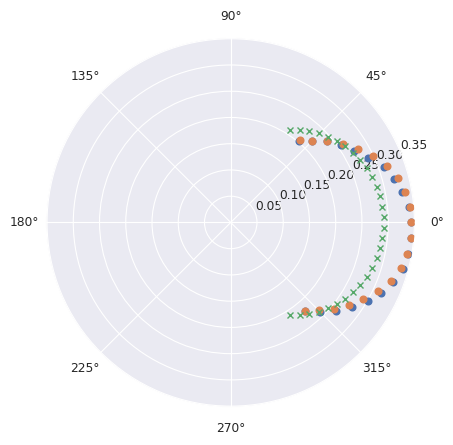

In [35]:
plt.axes(projection='polar')

df=pd.read_csv("LambertschesGesetz.csv")
rads = df["Winkel"]*2*np.pi/360

plt.polar(rads, df["Spannung 1"], "o") 
plt.polar(rads, df["Spannung 2"], "o")
sigma=5.6704E-8 #W/m^4/K^2
T=360+273.15

plt.polar(np.linspace(-1, 1, 30), 0.115+np.ones(30)*sigma*T**4/4/0.115**2*0.032**2*np.cos(np.linspace(-1, 1, 30))/1000, "x")
plt.show()

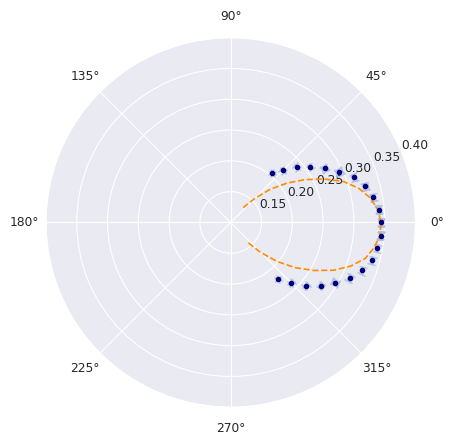

In [36]:
theta = df['Winkel'] * np.pi/180
e_theta = np.sqrt(2) * np.pi/180
r = (df['Spannung 1'] + df['Spannung 2'])/2
e_r = abs(df['Spannung 1'] - r)

plt.axes(projection='polar')
plt.errorbar(theta, r, xerr= e_theta, yerr=e_r, markersize=6, fmt=".",color="navy", ecolor="lightsteelblue", elinewidth=2, capsize=3, label="Datapoints")
plt.plot(theta, r*np.cos(theta), color = 'darkorange', ls = '--')
plt.ylim((0.1, 0.4))
plt.show()

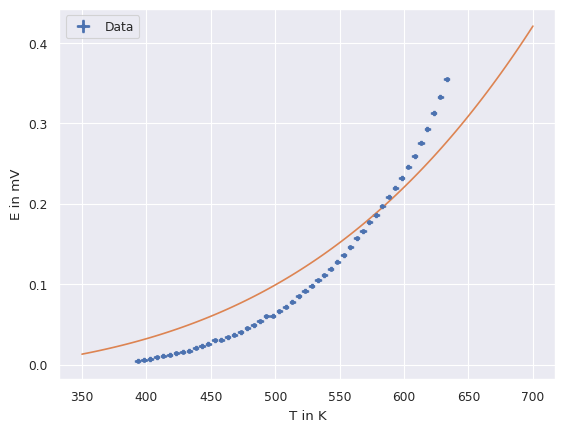

(1.81+/-0.06)e-12


In [4]:
df=pd.read_csv("EmittiereteStrahlung.csv")
temp=[]
spannung=[]
for i in range(len(df["Temperatur"])):
    temp.append(ufloat(df["Temperatur"][i]+273.15, 2))
temp=np.array(temp)
for i in range(len(df["Spannung"])):
    spannung.append(ufloat(df["Spannung"][i], 0.002))
spannung=np.array(spannung)

plt.errorbar([temp[i].n for i in range(len(temp))], [spannung[i].n for i in range(len(spannung))],
             yerr=[spannung[i].s for i in range(len(spannung))] , xerr=[temp[i].s for i in range(len(temp))],
             label="Data", fmt=".", capsize=1, elinewidth=2)


from scipy.optimize import curve_fit
def function(T, a):
    return a*(T**4-298**4) #raumtemperatur abziehen
popt, pcov=curve_fit(function, [temp[i].n for i in range(len(temp))], [spannung[i].n for i in range(len(spannung))],
                     sigma=[spannung[i].s for i in range(len(spannung))], p0=[sigma])
a=ufloat(popt[0], np.sqrt(pcov))
plt.plot(np.linspace(350, 700, 100), function(np.linspace(350, 700, 100), popt[0]))
#model_cold = np.poly1d(np.polyfit(df["Temperatur"], df["Spannung"], 3))
#plt.plot(df["Temperatur"], model_cold(df["Temperatur"]), color="blue")
plt.ylabel("E in mV")
plt.xlabel("T in K")
plt.legend()
plt.savefig("SpannungTemp.png", dpi=500, bbox_inches="tight")
plt.show()
print(a)

In dem Fit ist ein weiterer Parameter b erforderlich, da unsere Messung einen gewissen Offset hat. 

           4             3             2
7.982e-14 x - 1.435e-10 x + 1.005e-07 x - 3.178e-05 x + 0.003782
a: 1.6526377671955845e-15


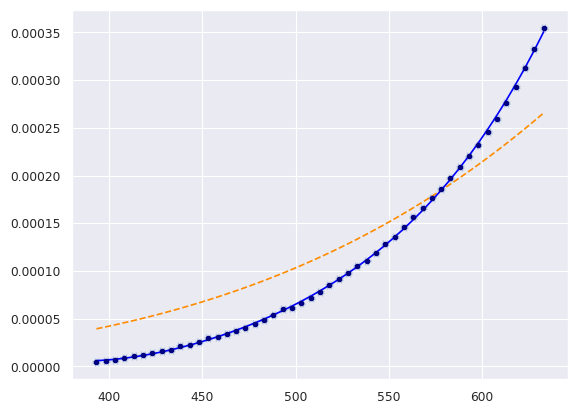

In [37]:
df=pd.read_csv('EmittiereteStrahlung.csv')
temp = df['Temperatur'] + 273.15 #in K
temp0 = 298 #room temp in K
e_temp = 1 #in K
volt = df['Spannung'] * 10**(-3) #in V
e_volt = 0.001 * 10**(-3) #in K

plt.errorbar(temp, volt, xerr= e_temp, yerr=e_volt, markersize=6, fmt=".",color="navy", ecolor="lightsteelblue", elinewidth=2, capsize=3, label="Datapoints")

#fit to normal stefan boltzmann eq
def func(x,a):
    return a*(x**4)#-298**4)
    
res, covmat = sp.optimize.curve_fit(func, temp, volt)
l = np.linspace(min(temp), max(temp), 100)
plt.plot(l,func(l,res[0]), ls = '--', color = 'darkorange')

#Plotting the fit with numpy
model = np.poly1d(np.polyfit(temp, volt, 4))
plt.plot(temp, model(temp), color="blue")
print(model) #returns the coeffitients

print('a:', res[0])
a_4 = res[0]

       3        2
89.01 x - 1797 x + 1.211e+04 x - 2.722e+04


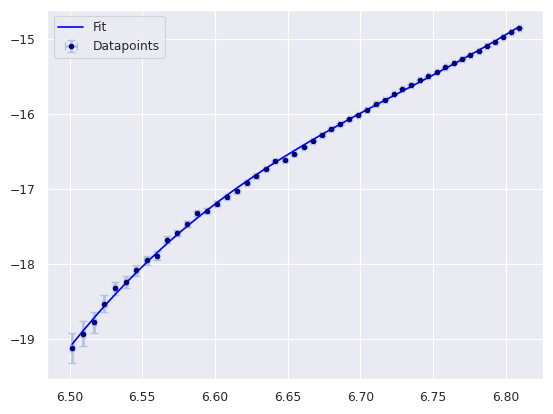

In [7]:
utemp = np.ones(len(temp)) * ufloat(1,1)
uvolt = np.ones(len(temp)) * ufloat(1,1)
logtemp = np.ones(len(temp)) * ufloat(1,1)
logvolt = np.ones(len(temp)) * ufloat(1,1)
for i in range(len(temp)):
    utemp[i] = ufloat(temp[i]+273.15, e_temp)
    logtemp[i] = umath.log(utemp[i])
    uvolt[i] = ufloat(volt[i], e_volt)/1000
    logvolt[i] = umath.log(uvolt[i])

plt.errorbar([logtemp[i].n for i in range(len(temp))], [logvolt[i].n for i in range(len(temp))], 
            xerr= [logtemp[i].s for i in range(len(temp))], yerr=[logvolt[i].s for i in range(len(temp))], 
            markersize=6, fmt=".",color="navy", ecolor="lightsteelblue", elinewidth=2, capsize=3, label="Datapoints")

model = np.poly1d(np.polyfit([logtemp[i].n for i in range(len(logtemp))], [logvolt[i].n for i in range(len(logvolt))], 3))
plt.plot([logtemp[i].n for i in range(len(logtemp))], model([logtemp[i].n for i in range(len(logtemp))]), color="blue", label="Fit")
print(model) #returns the coeffitients

plt.legend()

a: 9.106647274590797 b: -72.81288339549766


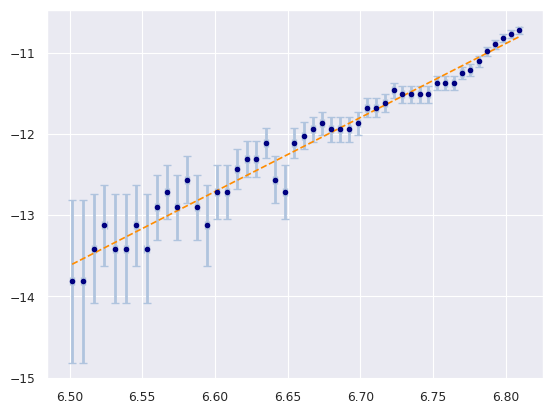

In [8]:
dvolt = np.ones(len(temp)) * ufloat(1,1)
logdvolt = np.ones(len(temp)) * ufloat(1,1)
#for i in range(len(temp)-1):
#    dvolt[i] = (volt[i] - volt[i+1]) #/ 5
#dvolt[48] = dvolt[47]
dvolt = - np.gradient(volt)
for i in range(len(temp)):
    uvolt[i] = ufloat(dvolt[i], e_volt)
    logdvolt[i] = umath.log(uvolt[i])


plt.errorbar([logtemp[i].n for i in range(len(temp))], [logdvolt[i].n for i in range(len(temp))], 
            xerr= [logtemp[i].s for i in range(len(temp))], yerr=[logdvolt[i].s for i in range(len(temp))], 
            markersize=6, fmt=".",color="navy", ecolor="lightsteelblue", elinewidth=2, capsize=3, label="Datapoints")

#fit to linear trend
def linfunc(x,a,b):
   return a*x+b

x = [logtemp[i].n for i in range(len(temp))]
y = [logdvolt[i].n for i in range(len(temp))]
res, covmat = sp.optimize.curve_fit(linfunc, x, y)
b = ufloat(res[1], np.sqrt(covmat[1][1]))
l = np.linspace(min(x), max(x), 100)
plt.plot(l, linfunc(l, res[0], res[1]), ls = '--', color = 'darkorange')
print('a:', res[0], 'b:', res[1])

In [9]:
#raumwinkel
r = ufloat(3.2, 0.14)/2
d = ufloat(11.5,1.4)
theta = umath.atan(r/d)
Omega = r**2 * np.pi / d**2
ratio = Omega / (2*np.pi)
ratio

0.009678638941398867+/-0.002504092540442787

In [10]:
#sensor range:
wconst = 2897.8#micrometers*K #wiensche verschiebungskonstante
wl_min = 0.2 #micrometers
wl_max = 50 #micrometers

T_min = wconst / wl_min
T_max = wconst/ wl_max

print('Sensor temperature range:', T_min, T_max)
print('measured temperatures:', 360+273.15, 120+273.15)

Sensor temperature range: 14489.0 57.956
measured temperatures: 633.15 393.15


In [38]:

epsilon = ufloat(30,10)*10**(-6) # sensor sensitivity in V*m^2/W eigentlich richtig? # sigma W/(m^2T^4) 
A = (r*10**(-2))**2 *np.pi #area of sensor in m^2

K = A / (epsilon) #koefficient W/V
#Energy = Volt * K
#total emitted energy
E_max = max(volt)/(epsilon*ratio)
E_max

1222.6236979166667+/-515.8965324883198

In [31]:
1.8*10**-15 /epsilon

6.000000000000001e-11+/-2.0000000000000002e-11